In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [131]:
d2=pd.read_csv('abalone.csv')
d2.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d2['Sex']=le.fit_transform(d2['Sex'])

In [133]:
d2.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
#In sex column, 2 -male,0-female and 1- infants

In [135]:
d2.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

In [136]:
d2.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [137]:
d2.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [138]:
#there are no null values in this dataset

In [139]:
d2.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [140]:
#there are 4177 rows in this dataset
#there is great difference between 75% and maximum for whole weight,shucked weight,viscera weight and shell weight,so there are presence of outliers in this dataset

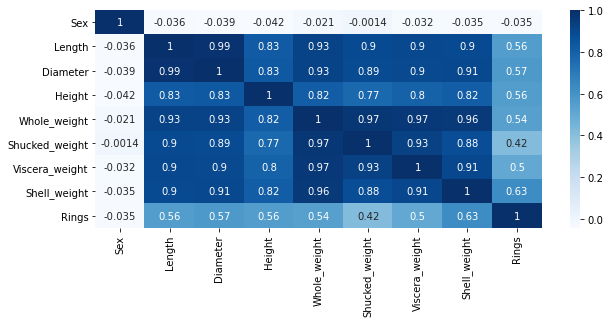

In [141]:
d2cor=d2.corr()
plt.figure(figsize=(10,4))
sns.heatmap(d2cor,cmap='Blues',annot=True)

In [142]:
#the correlation map clearly shows sex has strong negative relation with all other attributes
#all other attributes have a positive correlation with no.of rings.
#that means no.of rings depends on physical measurements and not on sex
#as length,height,diameter and weight increases no.of rings also increases

In [143]:
collist=d2.columns.values
ncol=9
nrows=8

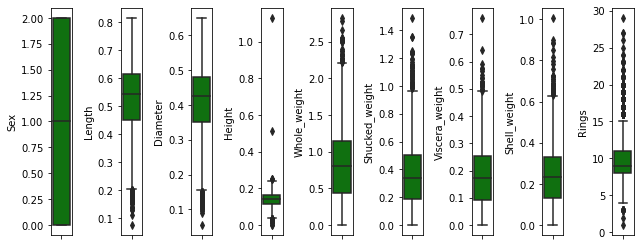

In [144]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d2[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [145]:
d2.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

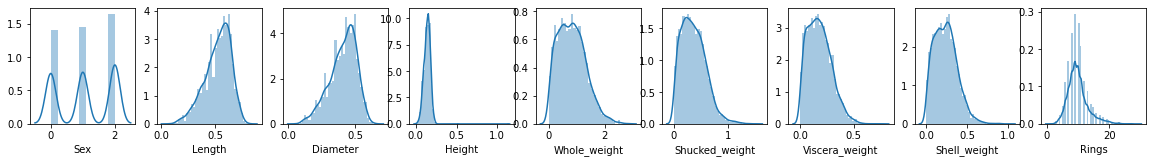

In [146]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d2[collist[i]])

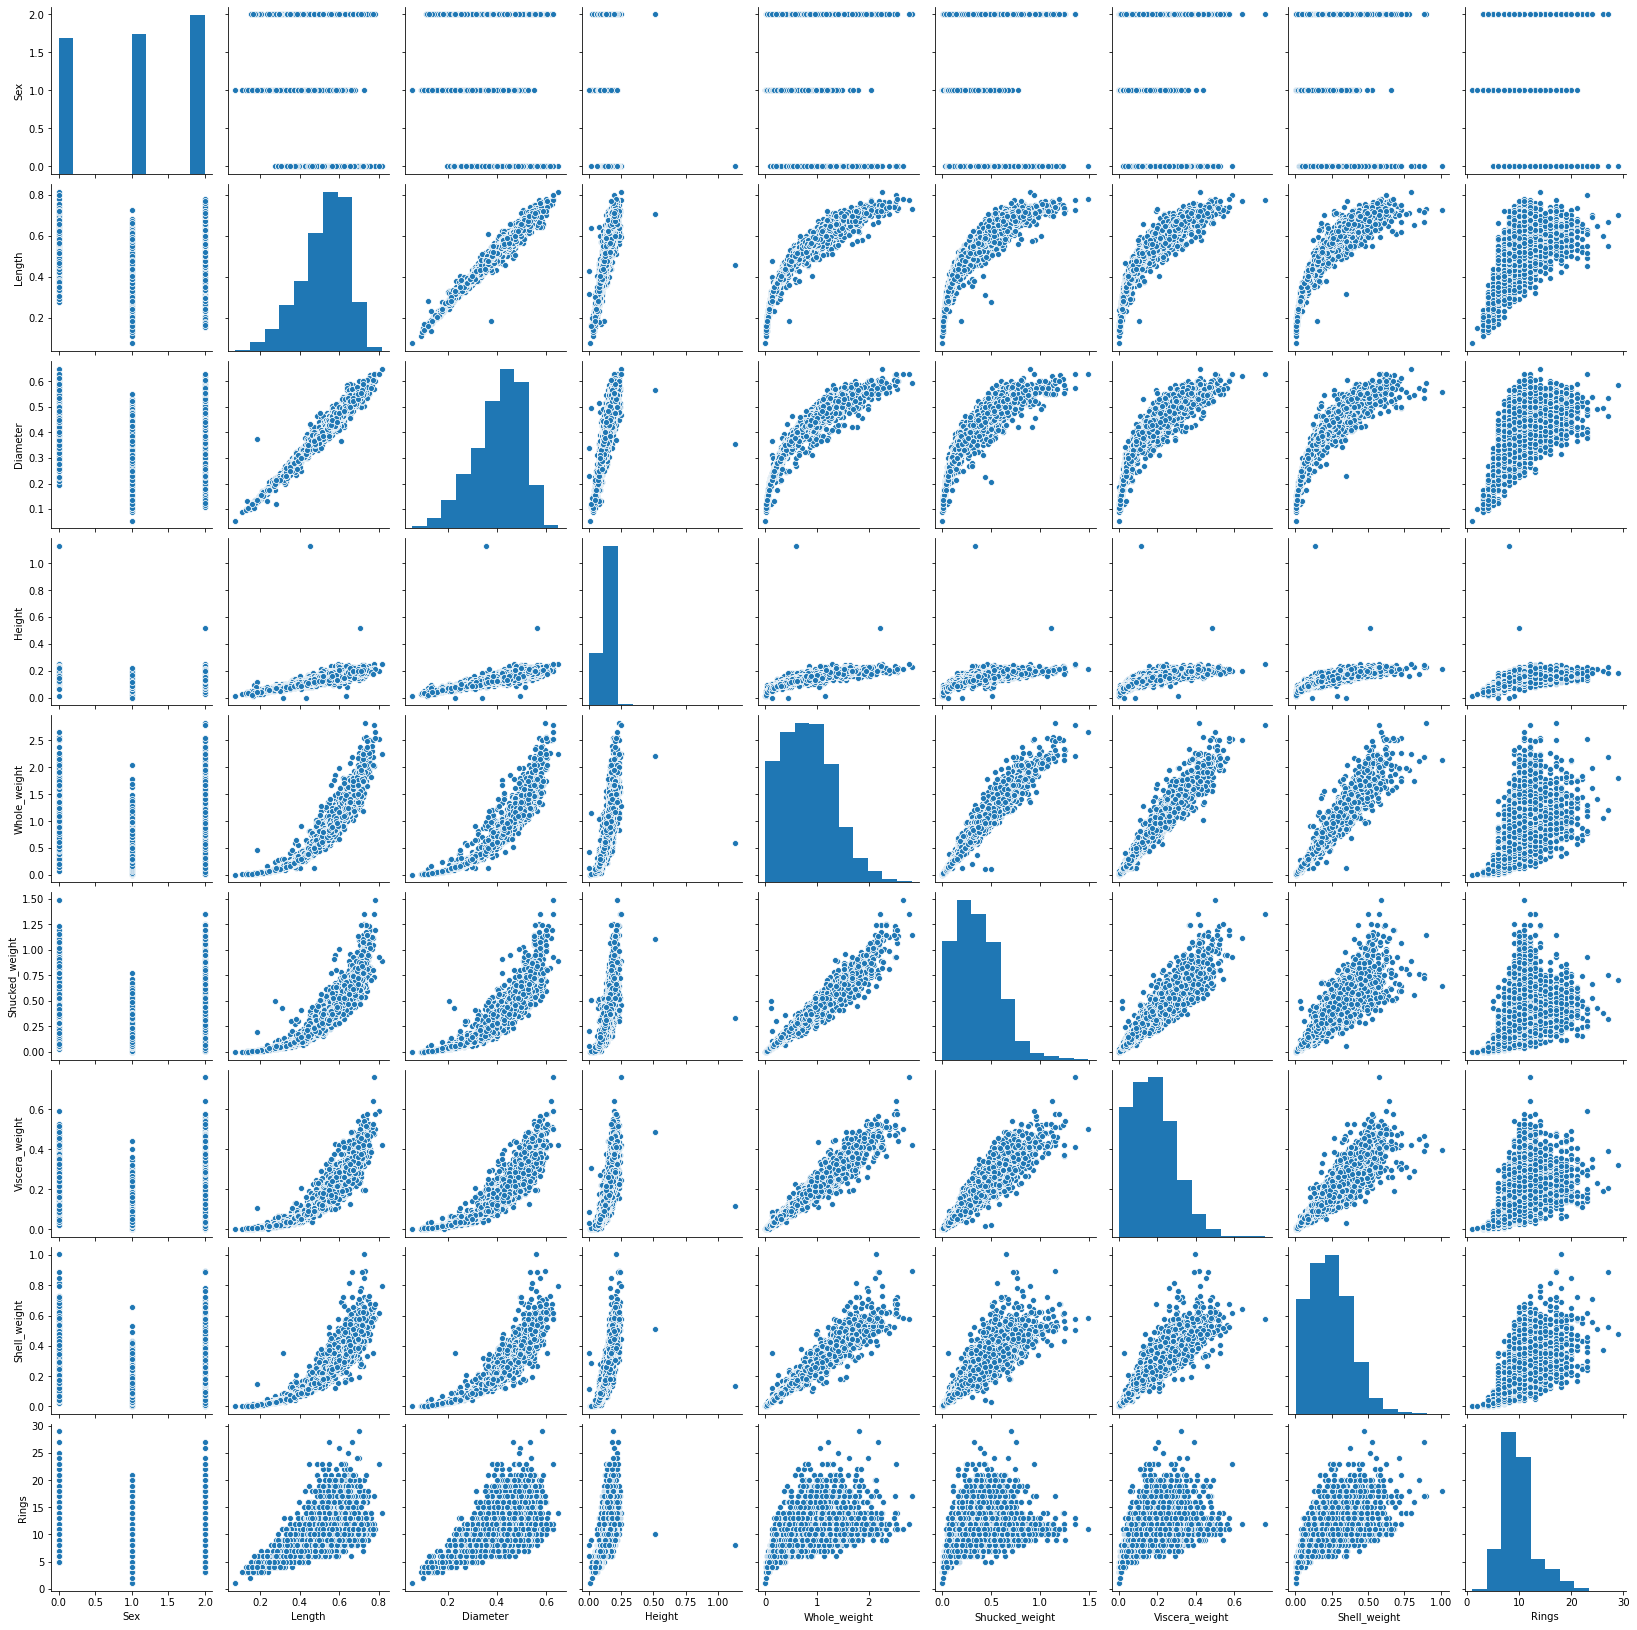

In [147]:
sns.pairplot(d2)

In [148]:
#correlation between length and diameter is extremely high
#whole weight is highly correlated with viscera weight,shucked weight and shell weight
#most of the abalone rings are between 5 and 15

In [149]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d2))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [150]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [151]:
z[236,1]

3.739153672082058

In [152]:
d2_new=d2[(z<3).all(axis=1)]
print(d2.shape)
print(d2_new.shape)

(4177, 9)
(4027, 9)


In [153]:
#150 rows are deleted due to presence of outliers

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [155]:
x=d2_new.iloc[:,:-1]
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [156]:
y=d2_new.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [157]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.15969763, -0.56936804, -0.42027443, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [ 1.15969763, -1.47535808, -1.4631268 , ..., -1.20941043,
        -1.23110406, -1.25603283],
       [-1.28538214,  0.07776771,  0.15329438, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 1.15969763,  0.68176107,  0.72686319, ...,  0.85473721,
         1.08172072,  0.60445329],
       [-1.28538214,  0.89747298,  0.83114842, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.15969763,  1.63089349,  1.56114509, ...,  2.88981235,
         1.94298183,  2.06626381]])

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 52 is 0.22573363431151242


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [163]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.28555304740406323
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 12  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7 15 23  5  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5 42 15 10  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 21 46 41  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 11 34 66 37  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 13 59 51 18  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  6 10 34 39 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  2 19 19  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  2 11 16  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 11 12  5  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  8  9  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  7  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  4  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  5  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

      

In [170]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2516930022573363
[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5  11   5   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7   9  28   1   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  39   4  29   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  19   2  96   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   9   4 133   8   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6   1 111  21   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   1  73  24  13   1   0   0   0   0   0   0   0]
 [  0   0   0   0   3   1  36   9   4   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0  27   4   1   0   1   0   0   1   0   0   0]
 [  0   0   0   0   0   1  18   9   1   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0  17   6   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   5   0   0   0   0   0   0 

In [171]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2516930022573363
[[  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5  11   5   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7   9  28   1   7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  39   4  29   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  19   2  96   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   9   4 133   8   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6   1 111  21   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   1  73  24  13   1   0   0   0   0   0   0   0]
 [  0   0   0   0   3   1  36   9   4   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0  27   4   1   0   1   0   0   1   0   0   0]
 [  0   0   0   0   0   1  18   9   1   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0  17   6   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   5   0   0   0   0   0   0 

In [172]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.2178329571106095
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  4  5  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  7  6  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  9 14 14  7  1  1  0  1  3  0  0  0  0  0  0]
 [ 0  0  6 21 20 13  7  2  2  1  1  1  0  0  0  0  0]
 [ 0  0  2  8  9 32 26 24  6  4  3  3  0  0  0  0  0]
 [ 0  0  0  5  9 27 44 30 25  9  2  3  2  0  2  0  1]
 [ 0  0  0  4  1 16 27 30 29 13 11  5  3  1  1  3  4]
 [ 0  0  1  2  1 14 18 24 29  9  3  3  5  6  0  1  0]
 [ 0  0  0  0  0  4 11 11 11  4  7  1  3  0  0  0  1]
 [ 0  0  0  1  0  2  4  6  6  5  3  2  1  1  4  1  0]
 [ 0  0  0  0  2  1  7  3  8  2  4  0  1  0  0  0  2]
 [ 0  0  0  0  1  2  2  5  6  2  3  2  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  3  0  0  0  2  1  2  0  0]
 [ 0  0  0  0  0  1  1  1  2  4  2  0  1  0  2  0  0]
 [ 0  0  0  0  0  1  0  2  1  0  1  0  0  1  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  2  0  1  2]]
              precision    recall  f1-score   support

       

In [173]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.23024830699774265
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 11  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 10 18 17  5  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 26 23  9  6  6  0  0  1  0  0  0  0  0  0]
 [ 0  0  2  7 28 39 25 10  3  2  1  0  0  0  0  0  0]
 [ 0  0  1  6 14 41 48 32 13  3  1  0  0  0  0  0  0]
 [ 0  0  0  2 10 21 45 40 21  4  2  0  1  0  1  1  0]
 [ 0  0  0  5  3 14 26 38 21  4  3  1  0  0  0  1  0]
 [ 0  0  0  0  2  6 14 13 12  1  4  1  0  0  0  0  0]
 [ 0  0  0  0  2  4  5 13  4  5  2  0  0  0  1  0  0]
 [ 0  0  0  0  1  6  6  5  6  2  2  1  1  0  0  0  0]
 [ 0  0  0  0  1  3  3  9  5  0  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  3  3  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5  0  1  3  1  0  0  1  1  0]
 [ 0  0  0  0  0  0  2  4  1  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  2  1  0  1  0  0  0  0]]
              precision    recall  f1-score   support

      

In [174]:
from sklearn.model_selection import cross_val_score

In [176]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.2146402  0.24441687 0.24720497 0.24347826 0.2447205 ]
0.23889215973367448 0.012188393818978408


In [177]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.17369727 0.19851117 0.20124224 0.2310559  0.21118012]
0.2031373395188262 0.018632460930755452


In [178]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.19354839 0.24441687 0.20248447 0.22111801 0.24720497]
0.22175454279241097 0.02158070174283067


In [180]:
import joblib
joblib.dump(svc,'svc_abalone.pkl')

['svc_abalone.pkl']